# Relativity Python mini-project: Simulation of a neutrino beam

## 1. PARENT-PARTICLE REST FRAME
    
Consider a generic 2-body decay $A \rightarrow B + C$ with masses $m_A$, $m_B$, $m_C$. You should have already thought through all the physics of this in the seminar.

We will consider below the specific example of decays of pions ($\pi$), and kaons ($K$) into a lepton ($L$) and its associated neutrino ($\nu_L$):  $\pi$, $K\rightarrow L$ + $\nu_L$.

There are three types of charged lepton known and each has a corresponding neutrino - the electron $e$ and electron neutrino $\nu_e$; their heavier analogues the muon $\mu$ and muon neutrino $\nu_\mu$; and heavier still, the tau $\tau$ and tau neutrino $\nu_\tau$.

For the particle (rest-)masses, use the approximations:
\begin{align*}
m_\pi &= 140\,\text{MeV/$c^2$} \\
m_K  &= 490\,\text{MeV/$c^2$} \\
m_e &= 511\,\text{keV/$c^2$} \\
m_{\nu_e} &= 1.1 \,\text{eV/$c^2$} \\
m_\mu &= 105\,\text{MeV/$c^2$}\\
m_{\nu_\mu} &= 0.19\,\text{MeV/$c^2$} \\
m_\tau &= 1777\,\text{MeV/$c^2$} \\
m_{\nu_\tau} &= 18.2 \,\text{MeV/$c^2$} \\
\end{align*}

In places below, we'll use the abbreviations rf refer to the rest frame and lf for the lab frame.

Throughout the code, work in natural units based on MeV, that is:
- energy units of MeV
- momentum units of MeV/c
- mass units of MeV/c^2

### 1.1 Write a function which calculates the energy of the product particle $C$ in the rest frame of the parent particle

In [1]:
e=1.602e-19

c=3e8 #speed of light
eM=e*1e6 #useful for converting energies from SI to MeV
eG=eM*1e3 #useful for converting energies from SI to GeV

def findEProd_rf(ma,mb,mc):
    #initial mtm=0 in parent rest frame
    #return energy in natural units for inputs in natural units
    return (ma**2-mb**2+mc**2)/(2*ma)

### 1.2  For the decay $\pi, K \rightarrow e+\nu_e$, use the function you've just written to calculate the energies of the two decay products in the parent-particle rest frame: Ee\_rf\_pi and Enu\_e\_rf\_pi for the pion decay and Ee\_rf\_K and Enu\_e\_rf\_K for the kaon decay and verify that energy is conserved.

In [2]:
mpi=140 #units MeV/c^2
mK=490
me=511e-3
mnu_e=1.1e-6 

print('pi, K --> e + nu_e')

Enu_e_rf_pi=findEProd_rf(mpi,me,mnu_e)/(1e3) #in GeV - need to remember to convert back to SI later!
print('Pi decay: nu energy ',Enu_e_rf_pi,' GeV')

Enu_e_rf_K=findEProd_rf(mK,me,mnu_e)/(1e3)
print(' K decay: nu energy ',Enu_e_rf_K,' GeV')

pi, K --> e + nu_e
Pi decay: nu energy  0.069999067425  GeV
 K decay: nu energy  0.24499973355000002  GeV


### 1.3 Now for the decay $\pi, K \rightarrow \mu+\nu_\mu$, calculate the energies of the two decay products in the parent-particle rest frame: Emu\_rf\_pi and Enu\_mu\_rf\_pi for the pion decay and Emu\_rf\_K and Enu\_mu\_rf\_K for the kaon decay and verify that energy is conserved.

In [3]:
mmu=105
mnu=0.19 

print('pi, K --> mu + nu_mu')

Emu_rf_pi=findEProd_rf(mpi,mnu,mmu)
print('Pi decay: mu energy ',Emu_rf_pi,' MeV')

Enu_mu_rf_pi=findEProd_rf(mpi,mmu,mnu) 
print('Pi decay: nu energy ',Enu_mu_rf_pi,' MeV')

Emu_rf_K=findEProd_rf(mK,mnu,mmu)
print('K decay: mu energy ',Emu_rf_K,' MeV')

Enu_mu_rf_K=findEProd_rf(mK,mmu,mnu)  
print('K decay: nu energy ',Enu_mu_rf_K,' MeV')

pi, K --> mu + nu_mu
Pi decay: mu energy  109.37487107142857  MeV
Pi decay: nu energy  30.625128928571428  MeV
K decay: mu energy  256.2499631632653  MeV
K decay: nu energy  233.7500368367347  MeV


### 1.4(a) Now, for the decay $\pi, K \rightarrow \tau+\nu_\tau$, calculate the energy of the decay products in the parent-particle rest frame: Etau\_rf\_pi and Enu\_tau\_rf\_pi for the pion decay and Etau\_rf\_pi and Enu\_tau\_rf\_K for the kaon decay.

In [4]:
mtau=1777 
mnu_tau=18.2

Enu_tau_rf_pi=findEProd_rf(mpi,mtau,mnu_tau)
print('Pi decay: nu energy ',Enu_tau_rf_pi,' MeV')

Enu_tau_rf_K=findEProd_rf(mK,mtau,mnu_tau)  
print(' K decay: nu energy ',Enu_tau_rf_K,' MeV')

Pi decay: nu energy  -11206.42057142857  MeV
 K decay: nu energy  -2976.834448979592  MeV


### 1.4(b) Finally, consider the decay of a different parent particle, the strange D meson, D$_s$, which can also decay into a $\tau$ and a $\nu_\tau$. For the decay $D_s \rightarrow \tau+\nu_\tau$, calculate the energies of the decay products in the parent-particle rest frame: Etau\_rf\_Ds and Enu\_tau\_rf\_Ds.  Take $m_{D_s}=1920$ MeV.

In [5]:
mDs=1920 

Enu_tau_rf_Ds=findEProd_rf(mDs,mtau,mnu_tau)
print(Enu_tau_rf_Ds,' MeV')

137.761  MeV


## FROM NOW ON WE WILL STUDY JUST THE DECAY $\rightarrow \mu + \nu_\mu$ 

In [6]:
Enu_rf_pi=Enu_mu_rf_pi
Enu_rf_K=Enu_mu_rf_K

In [7]:
import numpy as np

### 1.5(a) Write a function to calculate the 3-momentum (again in the parent-particle rest frame) of particle $C$ n Cartesian coordinates as a function of its polar angle $\theta$ with respect to the $z$-axis and azimuthal angle $\phi$. 

In [8]:
def find3mtmC_rf(ma,mb,mc,theta,phi): #3-momentum p of particle C 
    p=np.sqrt(findEProd_rf(ma,mb,mc)**2-mc**2)
    return p*np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])

### 1.5(b) Use the functions above to calculate the 3-momentum of the $\nu$ for both the $\pi$ decay and the $K$ decay in the parent-particle rest frame, for a particular value $\theta=30º$ and assuming the decay happens on the plane $x = 0$.

In [9]:
theta=np.pi/6
phi=np.pi/2

p_nu_rf_pi=find3mtmC_rf(mpi,mmu,mnu,theta,phi)
p_nu_rf_K = find3mtmC_rf(mK, mmu, mnu, theta, phi)
print('For theta=%.3f*pi:' % (theta/np.pi))
print('For pi decay: 3-mtm of nu in rf is ',p_nu_rf_pi,' MeV/c')
print('For K  decay: 3-mtm of nu in rf is ',p_nu_rf_K,' MeV/c')

For theta=0.167*pi:
For pi decay: 3-mtm of nu in rf is  [9.37606108e-16 1.53122698e+01 2.65216292e+01]  MeV/c
For K  decay: 3-mtm of nu in rf is  [7.15652850e-15 1.16874980e+02 2.02433403e+02]  MeV/c


### 1.5(c) Show that the total 3-momentum in the rest frame before and after the decay is conserved.

In [10]:
p_mu_rf_pi=find3mtmC_rf(mpi,mnu,mmu,np.pi+theta,phi)
print('For pi decay: 3-mtm of nu in rf is ',p_nu_rf_pi,' MeV/c')
print('For pi decay: 3-mtm of mu in rf is ',p_mu_rf_pi,' MeV/c')
print('For pi decay: total 3-mtm in rf is ',p_mu_rf_pi+p_nu_rf_pi,' MeV/c \n')

p_mu_rf_K=find3mtmC_rf(mK,mnu,mmu,np.pi+theta,phi)
print('For pi decay: 3-mtm of nu in rf is ',p_nu_rf_K,' MeV/c')
print('For pi decay: 3-mtm of mu in rf is ',p_mu_rf_K,' MeV/c')
print('For pi decay: total 3-mtm in rf is ',p_mu_rf_K+p_nu_rf_K,' MeV/c \n')

For pi decay: 3-mtm of nu in rf is  [9.37606108e-16 1.53122698e+01 2.65216292e+01]  MeV/c
For pi decay: 3-mtm of mu in rf is  [-9.37606108e-16 -1.53122698e+01 -2.65216292e+01]  MeV/c
For pi decay: total 3-mtm in rf is  [ 0.00000000e+00  3.55271368e-15 -1.06581410e-14]  MeV/c 

For pi decay: 3-mtm of nu in rf is  [7.15652850e-15 1.16874980e+02 2.02433403e+02]  MeV/c
For pi decay: 3-mtm of mu in rf is  [-7.15652850e-15 -1.16874980e+02 -2.02433403e+02]  MeV/c
For pi decay: total 3-mtm in rf is  [ 3.15544362e-30  5.68434189e-14 -2.84217094e-14]  MeV/c 



### 1.6 Write a function that takes as its inputs the energy and 3-momentum of a particle $C$ and returns the 4-momentum in the parent-particle rest frame. You will use this in the following parts

In [11]:
def find4mtm(E,p): #Combine energy and 3-momentum to give four-momentum 
    return np.insert(p,0,E)

mtm4nu_rf_pi=find4mtm(Enu_rf_pi,p_nu_rf_pi)
mtm4nu_rf_K=find4mtm(Enu_rf_K,p_nu_rf_K)

print('For pi decay: neutrino rf 4-momentum :',mtm4nu_rf_pi, ' MeV/c')
print('For K  decay: neutrino rf 4-momentum :',mtm4nu_rf_K, ' MeV/c')

For pi decay: neutrino rf 4-momentum : [3.06251289e+01 9.37606108e-16 1.53122698e+01 2.65216292e+01]  MeV/c
For K  decay: neutrino rf 4-momentum : [2.33750037e+02 7.15652850e-15 1.16874980e+02 2.02433403e+02]  MeV/c


### 1.7 Use the functions you have written to make a function find4mtm\_C\_rf(mA,mB,mC,theta,phi) which returns a four-element array of the four-momentum [$E/c$,$p$] of the product particle $C$ in the parent-particle rest frame ($p$ is the 3-momentum in Cartesian coordinates), where the inputs are the particle masses, and theta and phi are the angles $\theta$ and $\phi$ already described.

In [12]:
def find4mtm_C_rf(mA,mB,mC,theta1,phi1):
    EC=findEProd_rf(mA,mB,mC)    
    p_C=find3mtmC_rf(mA,mB,mC,theta1,phi1) #mtm of product of decay
    return find4mtm(EC,p_C)

### 1.8(a) Write a function for a general two-body decay that, given the 4-momentum of particles $A$ and $C$, uses 4-momentum conservation to compute the 4-momentum of particle $B$ and returns the direction of travel of particle B in spherical coordinates, ($\theta_B,\phi_B$).

In [13]:
def findangleB(mtm4A,mtm4C):
    mtm4B=mtm4A-mtm4C
    phiB=np.arctan2(mtm4B[2],mtm4B[1])
    pxyB=np.sqrt(mtm4B[1]**2+mtm4B[2]**2)
    thetaB=np.pi/2-np.arctan2(mtm4B[3], pxyB)
    return thetaB,phiB

### 1.8(b) Use this function, and the 4-momentum of the neutrino for the decay from 1.5(b) to compute the direction of travel of the generated muon in the pion rest frame.  Does this match your expectation? ***COMMENT IN YOUR DEBUGGING REPORT***

In [14]:
print('PION DECAY:')
mtm4pi_rf_pi=find4mtm(mpi,np.zeros(3))
theta_pi,phi_pi=findangleB(mtm4pi_rf_pi,mtm4nu_rf_pi)
print('muon theta ',theta_pi/np.pi,'pi')
print('muon phi ',phi_pi/np.pi,'pi')

print('KAON DECAY:')
mtm4pi_rf_K=find4mtm(mK,np.zeros(3))
theta_K,phi_K=findangleB(mtm4pi_rf_K,mtm4nu_rf_K)
print('muon theta ',theta_pi/np.pi,'pi')
print('muon phi ',phi_pi/np.pi,'pi')

PION DECAY:
muon theta  0.8333333333333334 pi
muon phi  -0.5000000000000001 pi
KAON DECAY:
muon theta  0.8333333333333334 pi
muon phi  -0.5000000000000001 pi


## 2. LAB FRAME
Now let's think about the same quantities you've just been considering, this time in the lab frame.

### 2.0(a) Given the mass and energy of a *general* particle in a particular frame, write a function which finds the value of $\beta$ of that particle's rest frame and another that returns $\gamma$ for the particle's rest frame.

In [15]:
def findbeta(E,m):
    gamma=E/m 
    v=np.sqrt(1-1/(gamma**2)) 
    return -v # equivalent to -v/c in SI units

def findgamma(beta):
    return 1/np.sqrt(1-beta**2)

### We'll now assume that the $\pi$ and $K$ are travelling in the lab frame with energy 1 GeV in direction $+z$.

### 2.0(b) Consider separately the decays of the K particle and the $\pi$ particle. For each decay, calculate the value of  $\beta$  *of the lab frame* as seen by the parent-particle rest frame.

In [16]:
EA_lf_pi=1e3
EA_lf_K=1e3
beta_lf_pi=findbeta(EA_lf_pi,mpi)
beta_lf_K=findbeta(EA_lf_K,mK)
print('beta of lab from pi rest frame is ',beta_lf_pi)
print('gamma of lab from pi lab frame is ',findgamma(beta_lf_pi))
print('beta of lab from K lab frame is ',beta_lf_K)
print('gamma of lab from K lab frame is ',findgamma(beta_lf_K))

beta of lab from pi rest frame is  -0.9901515035589251
gamma of lab from pi lab frame is  7.142857142857152
beta of lab from K lab frame is  -0.8717224328879004
gamma of lab from K lab frame is  2.0408163265306123


### 2.0(c) Assuming that the pion and kaon lifetimes $t_{rf}$ observed in their rest frames are $2.6·10^{-8} s$ and  $1.2·10^{-8} s$, respectively, compute their lifetime in the lab frame $t_{lf}$.

In [17]:
tau_rf_pi = 2.6e-8
tau_lf_pi = findgamma(beta_lf_pi)/tau_rf_pi
print('Pi lifetime (in s) in rf:', tau_rf_pi)
print('Pi lifetime (in s) in lf:', tau_lf_pi)

tau_rf_K = 1.2e-8
tau_lf_K = findgamma(beta_lf_K)/tau_rf_K
print('K lifetime (in s) in rf:', tau_rf_K)
print('K lifetime (in s) in lf:', tau_lf_K)

Pi lifetime (in s) in rf: 2.6e-08
Pi lifetime (in s) in lf: 274725274.72527504
K lifetime (in s) in rf: 1.2e-08
K lifetime (in s) in lf: 170068027.21088436


### 2.0(d) Generalise this to considering other pion and kaon energies: compute the ratio $t_{lf}/t_{rf}$ for a range of realistic values of $\beta$

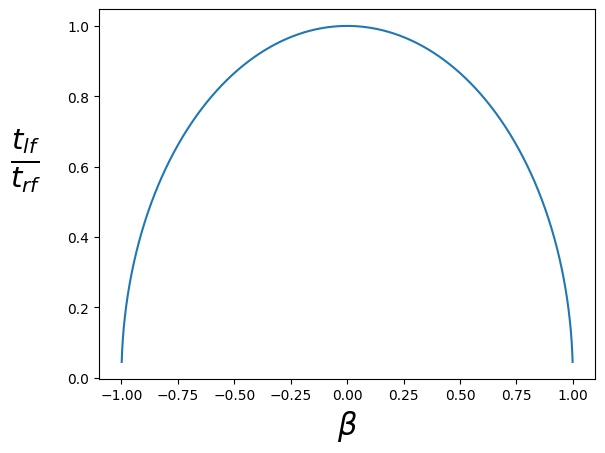

In [18]:
import matplotlib.pyplot as plt
delta=1e-3
beta_range = np.arange(-1+delta, 1, delta)
ratio = np.sqrt(1-beta_range**2)

plt.plot(beta_range, ratio)
plt.xlabel(r'$\beta$', fontsize=22)
plt.ylabel(r'$\frac{t_{lf}}{t_{rf}}$', fontsize=30, rotation=0, labelpad=30)
plt.show()

### 2.1 For the 1GeV pi decay, consider what happens if, following the decay, the muon emits a photon in the $+z$ direction, with frequency $f_{rf}$ in the pion's rest frame:
Identifying $f_{lf}$ as the frequency in the lab frame, calculate the ratio $r=f_{lf}/f_{rf}$.

Now plot the energy of the photon in the lab frame $E_{lf}$ as a function of the energy of the photon in the pion's rest frame, $E_{rf}$, as $E_{rf}$ varies. Choose a sensible range of energies for the plot.

 f_{lf}/f_{rf} =  14.215367882563786


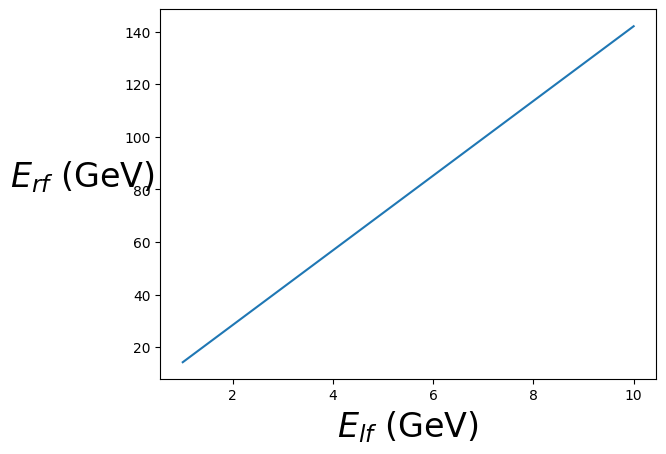

In [19]:
beta_lf_pi = findbeta(EA_lf_pi,mpi)
r = np.sqrt((1-beta_lf_pi)/(1+beta_lf_pi))
print(" f_{lf}/f_{rf} = ", r)
E_lf = np.linspace(1, 10, 100) 
plt.plot(E_lf, r*E_lf)
plt.xlabel(r'$E_{lf}$ (GeV)', fontsize=24)
plt.ylabel(r'$E_{rf}$ (GeV)', fontsize=24, rotation=0, labelpad=30)
plt.show()

### 2.2(a) Write a function which allows you to boost a 4-momentum along the positive z-axis

In [20]:
def boosted4mtm(m4,beta_b): #for boost along z-axis
    gamma_b=findgamma(beta_b)
    m4b0=gamma_b*m4[0]-beta_b*gamma_b*m4[3]
    m4b3=gamma_b*m4[3]-beta_b*gamma_b*m4[0]
    return np.array([m4b0,m4[1],m4[2],m4b3])

###  2.2(b) Compute the velocity of the neutrino in the lab frame from the 4-momentum in the lab frame. Compare the z-component of this result with what you obtain by applying the velocity addition formula in the rest frame. 

In [21]:

# For the pion decay
m4_nu_rf_pi=find4mtm(Enu_rf_pi,p_nu_rf_pi) #p_nu_rf_pi from 1.5b
m4_nu_lf_pi=boosted4mtm(m4_nu_rf_pi,beta_lf_pi)
v_nu_lf_pi = m4_nu_lf_pi[1:]/(mnu*findgamma(findbeta(m4_nu_lf_pi[0], mnu))) * c # p_lf = gamma_lf·m·v_lf
print('pi neutrino velocity lf from 4-mom in lf:', v_nu_lf_pi,' m/s')

beta_nu_rf_pi=findbeta(Enu_rf_pi,mnu)
v_nu_rf_pi = m4_nu_rf_pi[1:]/(mnu*findgamma(beta_nu_rf_pi)) * c # p_lf = gamma_lf·m·v_lf 
v_nu_rf_pi_z = v_nu_rf_pi[-1] # just z-component
v_nu_lf_pi_z = (v_nu_rf_pi_z-beta_lf_pi*c)/(1-(beta_lf_pi*v_nu_rf_pi_z/c))
print('pi neutrino velocity lf z-component from velocity addition: ', v_nu_lf_pi_z,' m/s')


# For the kaon decay
m4_nu_rf_K=find4mtm(Enu_rf_K,p_nu_rf_K)
m4_nu_lf_K=boosted4mtm(m4_nu_rf_K,beta_lf_K)
v_nu_lf_K = m4_nu_lf_K[1:]/(mnu*findgamma(findbeta(m4_nu_lf_K[0], mnu))) * c  # p_lf = gamma_lf·m·v_lf
print('K neutrino velocity lf from 4-mom in lf: ', v_nu_lf_K,' m/s')

beta_nu_rf_K=findbeta(Enu_rf_K,mnu)
v_nu_rf_K = m4_nu_rf_K[1:]/(mnu*findgamma(beta_nu_rf_K)) * c # p_lf = gamma_lf·m·v_lf 
v_nu_rf_K_z = v_nu_rf_K[-1] # just z-component
v_nu_lf_K_z = (v_nu_rf_K_z-beta_lf_K*c)/(1-(beta_lf_K*v_nu_rf_K_z/c))
print('K neutrino velocity lf z-component from velocity addition: ', v_nu_lf_K_z,' m/s')



pi neutrino velocity lf from 4-mom in lf: [6.92257517e-10 1.13054232e+07 2.99786870e+08]  m/s
pi neutrino velocity lf z-component from velocity addition:  299786870.5047222  m/s
K neutrino velocity lf from 4-mom in lf:  [2.56452763e-09 4.18819145e+07 2.97062116e+08]  m/s
K neutrino velocity lf z-component from velocity addition:  297062115.7299707  m/s


###  2.2(c) Compute the energy-momentum invariant for the neutrino in the lab and rest frame.

In [22]:

mcheck_pi=np.sqrt(m4_nu_rf_pi[0]**2-(m4_nu_rf_pi[1]**2+m4_nu_rf_pi[2]**2+m4_nu_rf_pi[3]**2))
print('pi (rf): pi particle sqrt(E^2-p^2c^2)/c^2=',mcheck_pi,' MeV/c^2')

mcheck_pi2=np.sqrt(m4_nu_lf_pi[0]**2-(m4_nu_lf_pi[1]**2+m4_nu_lf_pi[2]**2+m4_nu_lf_pi[3]**2))
print('pi (lf): pi particle  sqrt(E^2-p^2c^2)/c^2=',mcheck_pi2,' MeV/c^2')

mcheck_K=np.sqrt(m4_nu_rf_K[0]**2-(m4_nu_rf_K[1]**2+m4_nu_rf_K[2]**2+m4_nu_rf_K[3]**2))
print(' K (rf): K particle  sqrt(E^2-p^2c^2)/c^2=',mcheck_K,' MeV/c^2')

mcheck_K2=np.sqrt(m4_nu_lf_K[0]**2-(m4_nu_lf_K[1]**2+m4_nu_lf_K[2]**2+m4_nu_lf_K[3]**2))
print(' K (lf): K particle  sqrt(E^2-p^2c^2)/c^2=',mcheck_K2,' MeV/c^2')

pi (rf): pi particle sqrt(E^2-p^2c^2)/c^2= 0.19000000000008713  MeV/c^2
pi (lf): pi particle  sqrt(E^2-p^2c^2)/c^2= 0.18999999999350525  MeV/c^2
 K (rf): K particle  sqrt(E^2-p^2c^2)/c^2= 0.18999999999350525  MeV/c^2
 K (lf): K particle  sqrt(E^2-p^2c^2)/c^2= 0.18999999976373816  MeV/c^2


### 2.2d At what angle is the neutrino travelling in the lab frame? Use the function you wrote in 1.8a to find the angle at which the muon is travelling in the lab frame. Does this match your expectation? ***COMMENT IN YOUR DEBUGGING REPORT***

In [23]:
print('PION DECAY:')
phiC_lf_pi=np.arctan2(m4_nu_lf_pi[2],m4_nu_lf_pi[1])
pxyC_lf_pi=np.sqrt(m4_nu_lf_pi[1]**2+m4_nu_lf_pi[2]**2)
thetaC_lf_pi=np.pi/2-np.arctan2(m4_nu_lf_pi[3], pxyC_lf_pi)

print('neutrino theta (lf):',thetaC_lf_pi/np.pi,'pi')
print('neutrino phi (lf):  ',phiC_lf_pi/np.pi,'pi')

m4_pi_rf_pi=find4mtm(EA_lf_pi,np.array([0.,0.,0.]))
m4_pi_lf_pi=boosted4mtm(m4_pi_rf_pi,beta_lf_pi)
theta_lf_pi, phi_lf_pi = findangleB(m4_pi_lf_pi,m4_nu_lf_pi)

print('muon theta (lf):    ',theta_lf_pi/np.pi,'pi')
print('muon phi (lf):      ',phi_lf_pi/np.pi,'pi')

print('KAON DECAY:')
phiC_lf_K=np.arctan2(m4_nu_lf_K[2],m4_nu_lf_K[1])
pxyC_lf_K=np.sqrt(m4_nu_lf_K[1]**2+m4_nu_lf_K[2]**2)
thetaC_lf_K=np.pi/2-np.arctan2(m4_nu_lf_K[3], pxyC_lf_K)

print('neutrino theta (lf):',thetaC_lf_K/np.pi,'pi')
print('neutrino phi (lf):  ',phiC_lf_K/np.pi,'pi')

m4_K_rf_K=find4mtm(EA_lf_K,np.array([0.,0.,0.]))
m4_K_lf_K=boosted4mtm(m4_K_rf_K,beta_lf_K)
theta_lf_K, phi_lf_K = findangleB(m4_K_lf_K,m4_nu_lf_K)

print('muon theta (lf):    ',theta_lf_K/np.pi,'pi')
print('muon phi (lf):      ',phi_lf_K/np.pi,'pi')

PION DECAY:
neutrino theta (lf): 0.011998268913915599 pi
neutrino phi (lf):   0.5 pi
muon theta (lf):     0.0007311268733897094 pi
muon phi (lf):       -0.5000000000000001 pi
KAON DECAY:
neutrino theta (lf): 0.04458372279882961 pi
neutrino phi (lf):   0.5 pi
muon theta (lf):     0.03896271128176608 pi
muon phi (lf):       -0.5000000000000001 pi


### 2.3 Use the functions you have written to make a function find4mtm\_C\_lf(mA,mB,mC,theta,phi,EA) 
which returns a four-element array of the four-momentum [$E$,$pc$] of the product particle $C$ in the lab frame, with $E$ and $pc$ ($p$ is the 3-momentum in Cartesian coordinates), where the inputs are the particle masses mA, mB and mC, theta and phi, the angles $\theta$ and $\phi$ already described and EA, the parent-particle energy in the lab frame.

In [24]:
def find4mtm_C_lf(mA,mB,mC,theta1,phi1,EA):
    beta_lf_A=findbeta(EA,mA)
    m4_nu_rf_C=find4mtm_C_rf(mA,mB,mC,theta1,phi1)
    return boosted4mtm(m4_nu_rf_C,beta_lf_A)

### 2.4 What are the maximum and minimum values of the energy the product neutrino can have, in the lab frame, when the parent particle has energy 1 GeV? 

Define four variables Enu\_lf\_pi\_min, Enu\_lf\_pi\_max, Enu\_lf\_K\_min and Enu\_lf\_K\_min to contain these values, in natural units of MeV.

In [25]:
m4max_lf=find4mtm_C_lf(mpi,mmu,mnu,0.0,0.0,EA_lf_pi)
print('Max energy in lab frame (pi decay) is ',m4max_lf[0],' MeV') 

m4min_lf=find4mtm_C_lf(mpi,mmu,mnu,np.pi,0.0,EA_lf_pi)
print('Min energy in lab frame (pi decay) is ',m4min_lf[0],' MeV') 

Max energy in lab frame (pi decay) is  435.3433056967979  MeV
Min energy in lab frame (pi decay) is  2.1585361399373255  MeV


## 3. ENERGY DISTRIBUTIONS

The purpose of this part is to simulate what you would find in a real experiment using the code previously written. By treating each decay event as a random and independent process, we hope to simulate decays in a realistic manner.

#### Intro: PRELIMINARIES 
#### Understanding the RANDOM NUMPY library

In [26]:
import numpy as np

print('A random number between 0 and 1: ',np.random.rand())
print('A random number between 0 and 10: ',10 * np.random.rand())
print('An array of 20 random numbers between 0 and 10:', np.random.randint(10, size=20)) 

A random number between 0 and 1:  0.8711140288438851
A random number between 0 and 10:  7.767582214082044
An array of 20 random numbers between 0 and 10: [0 7 0 4 7 7 2 4 6 0 6 4 1 0 1 1 2 3 0 6]


#### What do you expect the distribution of random numbers to be like? To answer this question, we sample a sufficiently large set of numbers between 0 and 10 (both limits included) and plot the distribution of values.

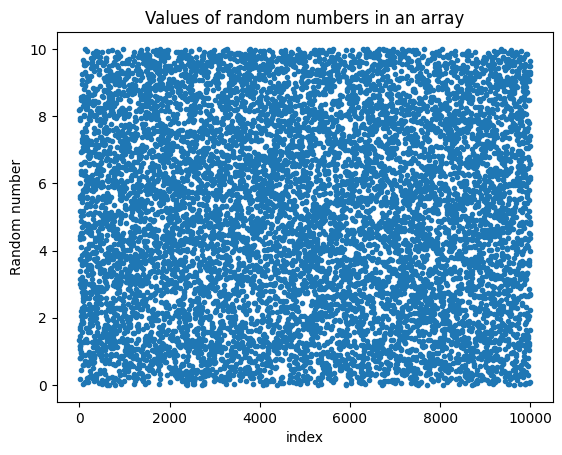

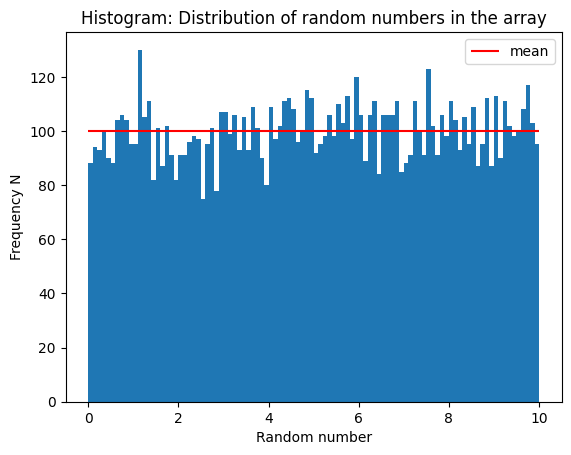

In [27]:
## Import plotting library
import matplotlib.pyplot as plt

Ns = 10000
random_numbers=10*np.random.rand(Ns)
plt.plot(random_numbers,'.')
plt.xlabel('index')
plt.ylabel('Random number')
plt.title('Values of random numbers in an array')
plt.show()

## Make a histogram of the list and include a horizontal line indicating the expected value  
Nbins = 100
plt.hist(random_numbers, bins=Nbins)
plt.hlines(xmin=0, xmax=10, y=Ns/Nbins, color='r', label='mean')
plt.xlabel('Random number')
plt.ylabel('Frequency N')
plt.title('Histogram: Distribution of random numbers in the array')
plt.legend()
plt.show()

#### Sometimes you may want to generate a set of values that are not uniformly distributed, but instead some values are generated more frequently than others. There are predefined functions for some of these cases (such as for a Gaussian). For other specific cases, it may be necessary to define the function from which the sample is to be taken. In the following example, we'll demonstrate this using the $p(x)=(x/x_{max})^2$ (with $x\leq xmax$) distribution. 

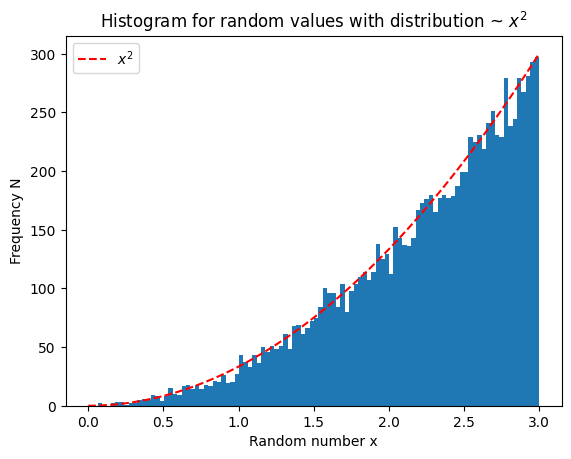

In [28]:
xmin = 0
xmax = 3
x_domain = [xmin, xmax] #domain of x will be xmin<=x<=xmax

def distribn_normalised(x): #p(x) distribution function; max value for domain should be 1
    return (x**2)/(xmax**2) 

def generate_x_array(Nevents, x_domain):
    """
    This function yields an array of values of x in the interval x_domain distributed 
    according to a distribution such that f(x) dx=x^2 dx
    The array is of length Narray
    """
    xvals = []
    lenout = 0 
    Nchunk = Nevents #number of random variables to generate each iteration of the while loop
    while lenout < Nevents: 
        xnew = x_domain[1] * np.random.rand(Nchunk) #generate new prospective values for x from a uniform distribution
        y1 = np.random.rand(Nchunk) #random number between 0 and 1 will determine whether to keep each x value
        # the frequency at which values are kept is proportional to the value of distribn_normalised
        xvals = np.append(xvals, xnew[y1 < distribn_normalised(xnew)]) 
        lenout = len(xvals) #check whether sufficient values have been generated yet
    return xvals[:Nevents] #return an array of the correct length

Nevents = 10000
Nbins = 100
distribn=generate_x_array(Nevents, x_domain)
plt.hist(distribn, bins=Nbins)

#make an x^2 line for comparison
x2=np.linspace(x_domain[0], x_domain[1], 100)
y2=(3*Nevents/(Nbins*xmax**2))*x2**2
#x^2 coefficient set so that (area under curve)=(bin width * Nevents) gives match to histogram
plt.plot(x2,y2,'r--',label='$x^2$')

plt.xlabel('Random number x')
plt.ylabel('Frequency N')
plt.legend()
plt.title('Histogram for random values with distribution ~ $x^2$')
plt.show()

### 3.0 Now think about how to apply this to simulate $N_{events}$ particle decays: rather than assuming a single value of $\theta$ as we have been so far, we need to generate a realistic distribution of $\theta$ across multiple decay events. What are the allowed $\theta_{rf}$ values for the neutrino (in the parent-particle rest frame) for each decay?  How likely is each angle $\theta_{rf}$?  After giving it some thought, you should be able to use a modified version of the code above to generate $\theta_{rf}$ for a series of $N_{events}$ parent-particle decay events and plot a histogram of the distribution of $\theta_{rf}$.

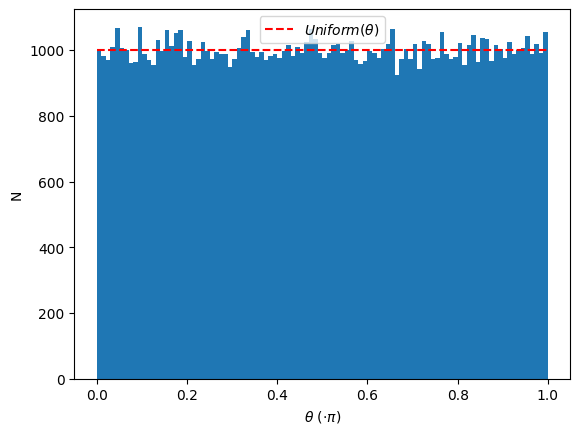

In [29]:
def generate_theta_array(Narray=1):
    """
    This function yields an array of values of theta in the interval [0; pi] distributed according
    to the theta distribution. The array is of length Narray
    """
    thetavals = []
    lenout = 0
    Nchunk = Narray
    while lenout < Narray:
        thetanew = np.pi * np.random.rand(Nchunk)        
        prob_theta = np.random.rand(Nchunk) 
        norm_prob_theta = prob_theta*np.pi #normalizing factor
        th1 = np.random.rand(Nchunk) #random number between 0 and 1 - keep this value only if less than sin(theta)
        thetavals = np.append(thetavals, thetanew[th1 < norm_prob_theta])
        #sin theta is in the range 0 and 1 for 0<theta<pi so no normalisation is needed.
        lenout = len(thetavals)
    return thetavals[:Narray]

Nevents = 100000

distribn = generate_theta_array(Nevents)
plt.hist(distribn/np.pi, bins = Nbins)

#make a U(x) line for comparison
x3=np.linspace(0, 1, 100)
y3=[Nevents/Nbins]*len(x3)
#coefficient set so that (area under curve)=(bin width * Nevents) gives match to histogram
xpi_range = np.linspace(0, 1, 100)
plt.plot(xpi_range, y3,'r--',label=r'$Uniform(\theta)$')

plt.xlabel(r'$\theta$ $(·\pi)$')
plt.ylabel('N')
plt.legend()
plt.show()

### 3.1(a) Calculate the distributions of neutrino energies in the lab frame as a function of $\theta_{rf}$, for pion decays and for kaon decays, assuming parent particles with energy 1 GeV in the lab frame.

In [30]:
#EA_lf_pi and EA_lf_K defined earlier
#choose some number of decay events for each type:
Nrun_pi=5000
Nrun_K=5000

#Generate theta values using the previously defined function:
theta_rf_pi=generate_theta_array(Nrun_pi)
theta_rf_K=generate_theta_array(Nrun_K)            
                                   
# Define versions of previous functions which can handle arrays for different theta values
def find4mtmar(Efm,pfm): #Combine energy and 3-momentum to give four-momentum
    return np.insert(pfm, 0, Efm, axis=0)
def boosted4mtmar(m4,beta_b): #for boost along z-axis when dealing with an array
    gamma_b=findgamma(beta_b)
    return np.array([gamma_b*m4[0,:]-beta_b*gamma_b*m4[3,:],m4[1,:],m4[2,:],gamma_b*m4[3,:]-beta_b*gamma_b*m4[0,:]])

#calculate for pi decays first
gamma_v_pi=EA_lf_pi/mpi
beta_v_pi= -np.sqrt(1-1/(gamma_v_pi**2)) #beta of lab frame wrt rest frame
#find neutrino energy in lab frame
energy_nu_rf_pi=findEProd_rf(mpi, mmu, mnu) #particle C in lab frame indpt of angle theta_rf
p_rf_pi_ar = np.array([find3mtmC_rf(mpi, mmu, mnu, theta, 0.0) for theta in theta_rf_pi]).T
energy_nu_lf_pi2 = (gamma_v_pi*energy_nu_rf_pi - beta_v_pi*gamma_v_pi*p_rf_pi_ar[2,:])

#now calculate for K decays:
gamma_v_K = EA_lf_K/mK
beta_v_K = -np.sqrt(1-1/(gamma_v_K**2)) #beta of lab frame wrt rest frame
energy_nu_rf_K=findEProd_rf(mK,mmu,mnu) #particle C in lab frame indpt of angle theta_rf
p_rf_K_ar = np.array([find3mtmC_rf(mK, mmu, mnu, theta, 0.0) for theta in theta_rf_K]).T
energy_nu_lf_K2 = (gamma_v_K*energy_nu_rf_K - beta_v_K*gamma_v_K*p_rf_K_ar[2,:])

### 3.1(b) Find the analytical form of the dependence between the energy of the product neutrino in the lab frame, Enu_lf, and the angle $\theta$ in the rest frame. Plot it together with the numerial results that you obtained above. ***INCLUDE THIS PLOT and an explanation of how you found the analytical form in your debugging report*** 

5000


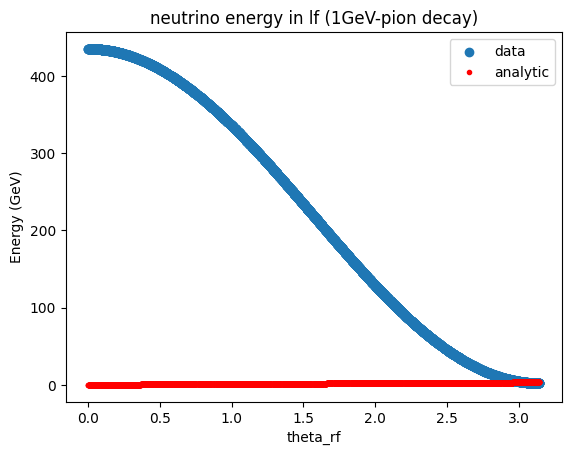

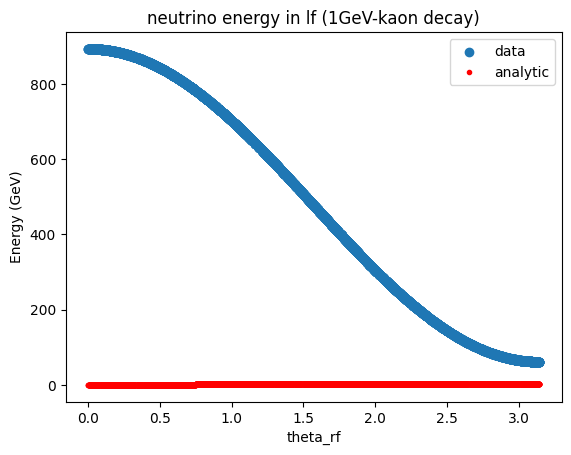

In [31]:
Ean_pi = theta_rf_pi
Ean_K = theta_rf_K

print(energy_nu_lf_pi2.size)

plt.scatter(theta_rf_pi,energy_nu_lf_pi2,label='data')
plt.plot(theta_rf_pi, Ean_pi,'r.',label='analytic')
plt.xlabel('theta_rf')
plt.ylabel('Energy (GeV)')
plt.title('neutrino energy in lf (1GeV-pion decay)')
plt.legend()
plt.show()

plt.scatter(theta_rf_K,energy_nu_lf_K2, label='data')
plt.plot(theta_rf_K,Ean_K,'r.', label='analytic')
plt.xlabel('theta_rf')
plt.ylabel('Energy (GeV)')
plt.title('neutrino energy in lf (1GeV-kaon decay)')
plt.legend()
plt.show()

### 3.1(c) Create plots for both decays of the histograms of Enu_lf.  Can you explain why the plots have the shape they do? If you can, ***include this in your debugging report***.

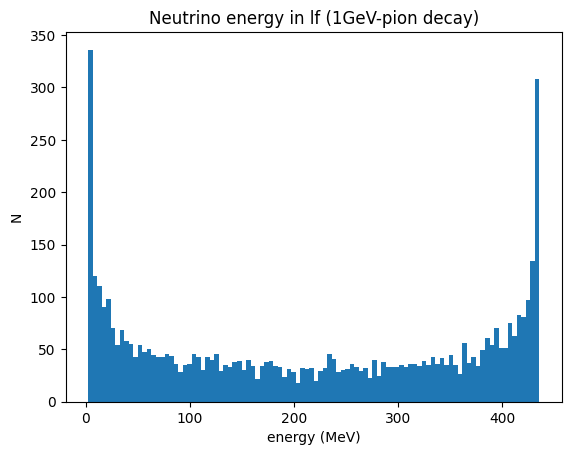

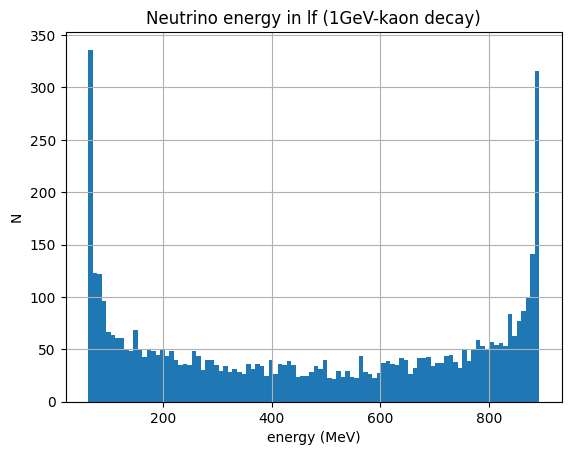

In [32]:
Nbins=100

(Nb_pi,binsb_pi,bbb_pi)=plt.hist(energy_nu_lf_pi2, bins = Nbins)

plt.ylabel('N')
plt.xlabel('energy (MeV)')
plt.title('Neutrino energy in lf (1GeV-pion decay)')
plt.show()

(Nb_K,binsb_K,bbb_K)=plt.hist(energy_nu_lf_K2, bins = Nbins)

plt.ylabel('N')
plt.xlabel('energy (MeV)')
plt.grid()
plt.title('Neutrino energy in lf (1GeV-kaon decay)')
plt.show()

### 3.1(d) Create plots for both decays of the histograms of the angular distribution in the lab frame of the number of neutrinos. Remark: use a log-scale for the y-axis, for clarity. 

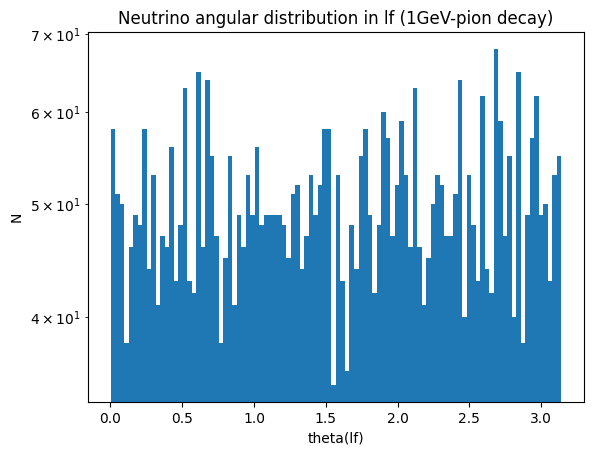

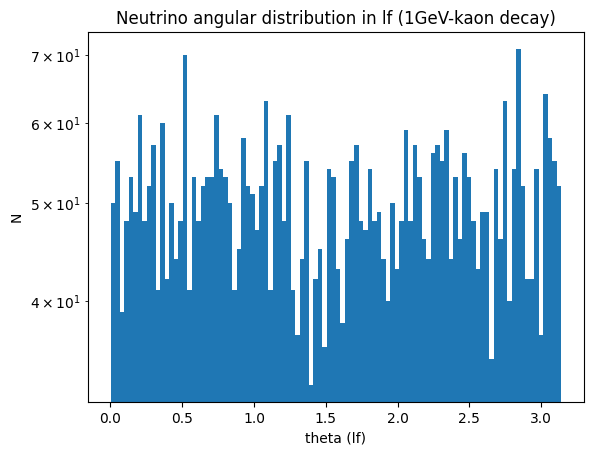

In [33]:
#extract theta_lf from the 4-momentum (remember the first entry is the Energy)
m4_lf_pi = np.array([find4mtm(energy_nu_rf_pi, find3mtmC_rf(mpi, mmu, mnu, theta, 0.0)) for theta in theta_rf_pi])
m4_lf_K = np.array([find4mtm(energy_nu_rf_K, find3mtmC_rf(mK, mmu, mnu, theta, 0.0)) for theta in theta_rf_K])
theta_lf_pi=np.array([np.pi/2-np.arctan2(each[3], np.sqrt(each[1]**2+each[2]**2)) for each in m4_lf_pi])
theta_lf_K=np.array([np.pi/2-np.arctan2(each[3], np.sqrt(each[1]**2+each[2]**2)) for each in m4_lf_K])

plt.hist(theta_lf_pi, bins = 100, log=True)
plt.ylabel('N')
plt.xlabel('theta(lf)')
plt.title('Neutrino angular distribution in lf (1GeV-pion decay)')
plt.show()

plt.hist(theta_lf_K, bins = 100, log=True)
plt.ylabel('N')
plt.xlabel('theta (lf)')
plt.title('Neutrino angular distribution in lf (1GeV-kaon decay)')
plt.show()

### 3.2 In this final part, you'll create a histogram plot of the distribution of energies of the product neutrinos in the lab frame. Start by assuming that the momenta of the $\pi$ and $K$ beams follow the log-normal distribution, and that there are 10 $\times$ more $\pi$ decays than $K$ decays in the beam. **Note**: you can assume that the code between the === in the cell below has been checked carefully and does not contain any errors

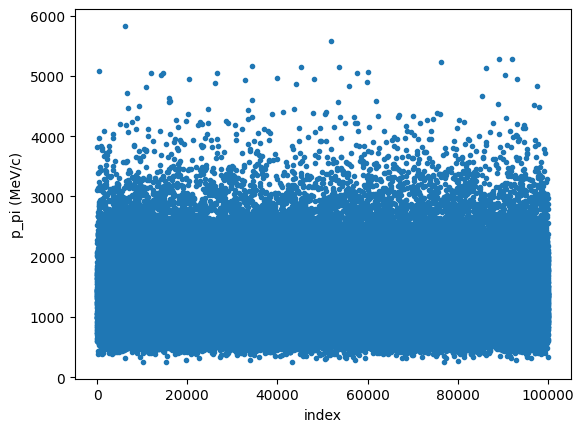

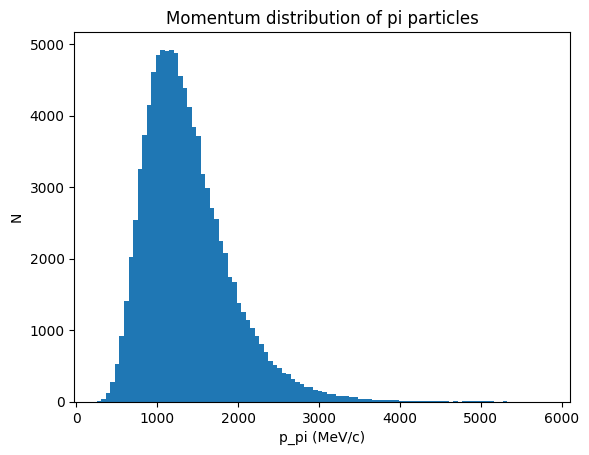

In [34]:
#================
def prob_distrib(x, mu=0, sigma=1):
    """
    Log normal PDF, depends on parameters mu and sigma, which are analogous to the 
    mu and sigma parameters of the Gaussian distribution
    """
    if type(x) != np.ndarray:
        if x <=0 :
            return 0
        else:
            return np.exp(- 0.5 * ((np.log(x) - mu) / sigma)**2) / (x * sigma * np.sqrt(2 * np.pi))
    else:
        x[x<=0] = 1e-40 #replace zero or negative values with 
        return np.exp(- 0.5 * ((np.log(x) - mu) / sigma)**2) / (x * sigma * np.sqrt(2 * np.pi))

def max_prob(mu=0, sigma=1):
    """
    Returns the mode (the value with the highest probability of occurring) of the log-normal distribution
    """
    return np.exp(mu - sigma**2)

def generate_array(x_min, x_max, mu=0, sigma=1, Narray=5000):
    """
    This function yields an array of values of x in the interval [x_min; x_max] distributed according
    to a log-normal distribution as defined in log_normal(x, mu, sigma)
    The array is of length Narray
    """
    pxvals=[]
    ymax = prob_distrib(max_prob(mu, sigma), mu, sigma) #maximum probability
    lenout=0
    Nchunk=Narray
    while lenout<Narray:
        px = (x_max - x_min) * np.random.rand(Nchunk) + x_min
        py = np.random.rand(Nchunk) * ymax # probability between 0 and the maximum.
        lognormx=prob_distrib(px*1e-3, mu, sigma) # probability for random value in [x_min and x_max]
        pxvals=np.append(pxvals, px[lognormx>py])
        lenout=len(pxvals)
    return pxvals[:Narray]


# use these values of sigma and mu throughout
sigma_pi = 0.375
sigma_K  = 0.5 
mu       = 0.25

# min and max values for energy
E_min = 0. #MeV
E_max = 6000. #MeV

#================

# The following code shows how to use the three functions defined above to generate a momentum distribution. 
# Note that the E_min and E_max inputs for generate_array are in MeV, and the output is in units of MeV/c

#the function takes an input argument n_samples: the number of values you want to generate in each call
n_samples_pi = 100000
n_samples_K = 10000

#distribution of momentum values for pi decay
mtm_distrib_E_pi=generate_array(E_min, E_max, mu, sigma_pi, n_samples_pi)

#distribution of momentum values for K decay 
mtm_distrib_E_K=generate_array(E_min, E_max, mu, sigma_K, n_samples_K)
   
plt.plot(mtm_distrib_E_pi,'.')
plt.xlabel('index')
plt.ylabel('p_pi (MeV/c)')
plt.show()
plt.close()

plt.hist(mtm_distrib_E_pi, bins = 100)
plt.xlabel('p_pi (MeV/c)')
plt.ylabel('N')
plt.title('Momentum distribution of pi particles')
plt.show()

### 3.3(a) In part 3.1 you generated a distribution of neutrino energies in the lab frame assuming a constant parent particle energy.  Repeat this here to plot the histogram of the energies of the product neutrinos, this time for each decay event drawing the energy of the parent particles from the distribution you have just calculated, as well as drawing $\theta$ from the random distribution you used before. 

In [35]:
#generate distribution of parent-particle energies
Nrun_pi = 100000
Nrun_K = 10000

#pi particles :
EA_pi=np.sqrt(mpi**2+mtm_distrib_E_pi**2)
#find corresponding gamma and beta
gamma_v_pi=EA_pi/mpi
beta_v_pi=-np.sqrt(1-1/(gamma_v_pi**2)) #beta of lab frame wrt rest frame


#K particles:
EA_K=np.sqrt(mK**2+mtm_distrib_E_K**2)
#find corresponding gamma and beta
gamma_v_K=EA_K/mK 
beta_v_K=-np.sqrt(1-1/(gamma_v_K**2)) #beta of lab frame wrt rest frame

#theta distribution
theta_rf_pi=generate_theta_array(Nrun_pi)
theta_rf_K=generate_theta_array(Nrun_K)

#in principle we should also choose phi randomly, although
#in fact the value of phi doesn't matter because of the symmetry of the problem around the z-axis
phi_rf_pi = 2*np.pi * np.random.rand(Nrun_pi)
phi_rf_K = 2*np.pi * np.random.rand(Nrun_K)

#calculate for pi decays first:
#find neutrino energy in rest frame
energy_nu_rf_pi=findEProd_rf(mpi,mmu,mnu) #particle C in rest frame indpt of angle theta_rf
#find neutrino 3-momentum in rest frame
p_rf_pi_ar=find3mtmC_rf(mpi,mmu,mnu,theta_rf_pi, phi_rf_pi) #particle C (nu) in rest frame    
#find neutrino 4-momentum in rest frame:
m4nu_rf_pi=find4mtmar(energy_nu_rf_pi,p_rf_pi_ar)

#find neutrino energy in lab frame:
energy_nu_lf_pi=boosted4mtmar(m4nu_rf_pi, beta_v_pi)[0]

#K decays
#find neutrino energy in rest frame
energy_nu_rf_K=findEProd_rf(mK,mmu,mnu) #particle C in rest frame indpt of angle theta_rf
#find neutrino 3-momentum in rest frame
p_rf_K_ar=find3mtmC_rf(mK,mmu,mnu,theta_rf_K,phi_rf_K) #particle C (nu) in rest frame    
#find neutrino 4-momentum in rest frame:
m4nu_rf_K=find4mtmar(energy_nu_rf_K,p_rf_K_ar)
  
#find neutrino energy in lab frame:
energy_nu_lf_K=boosted4mtmar(m4nu_rf_K,beta_v_K)[0]

In [36]:
#@c3.3a#@ #&2
#generate distribution of parent-particle energies
Nrun_pi = 100000
Nrun_K = 10000

#pi particles :
EA_pi=np.sqrt(mpi**2+mtm_distrib_E_pi**2)
#find corresponding gamma and beta
gamma_v_pi=EA_pi/mpi
beta_v_pi=-np.sqrt(1-1/(gamma_v_pi**2)) #beta of lab frame wrt rest frame

#K particles:
EA_K=np.sqrt(mK**2+mtm_distrib_E_K**2)
#find corresponding gamma and beta
gamma_v_K=EA_K/mK  
beta_v_K=-np.sqrt(1-1/(gamma_v_K**2)) #beta of lab frame wrt rest frame

#theta distribution
theta_rf_pi=generate_theta_array(Nrun_pi)
theta_rf_K=generate_theta_array(Nrun_K)

#in principle we should also choose phi randomly, although
#in fact the value of phi doesn't matter because of the symmetry of the problem around the z-axis
phi_rf_pi = 2*np.pi * np.random.rand(Nrun_pi)
phi_rf_K = 2*np.pi * np.random.rand(Nrun_K)

#calculate for pi decays first:
#find neutrino energy in rest frame
energy_nu_rf_pi=findEProd_rf(mpi,mmu,mnu) #particle C in rest frame indpt of angle theta_rf
#find neutrino 3-momentum in rest frame
p_rf_pi_ar=find3mtmC_rf(mpi,mmu,mnu,theta_rf_pi, phi_rf_pi) #particle C (nu) in rest frame    
#find neutrino 4-momentum in rest frame:
m4nu_rf_pi=find4mtmar(energy_nu_rf_pi,p_rf_pi_ar)

#find neutrino energy in lab frame:
energy_nu_lf_pi=gamma_v_pi*energy_nu_rf_pi-beta_v_pi*gamma_v_pi*p_rf_pi_ar[2,:]
    
#K decays
#find neutrino energy in rest frame
energy_nu_rf_K=findEProd_rf(mK,mmu,mnu) #particle C in rest frame indpt of angle theta_rf
#find neutrino 3-momentum in rest frame
p_rf_K_ar=find3mtmC_rf(mK,mmu,mnu,theta_rf_K,phi_rf_K) #particle C (nu) in rest frame    
#find neutrino 4-momentum in rest frame:
m4nu_rf_K=find4mtmar(energy_nu_rf_K,p_rf_K_ar)
  
#find neutrino energy in lab frame:
energy_nu_lf_K=boosted4mtmar(m4nu_rf_K,beta_v_K)[0]

REMARK[1]: energy_nu_lf_pi - trying to look up 4th element of a 3-vector - actually need 3rd element!

Note that the N values in the first few cells are unused and those defined in 3.2 are the ones really used

### 3.3(b) Now plot, on a single histogram, the energy distribution in the lab frame:
- for the $\pi$ decays only
- for K decays only and 
- for both decays.  

Use a log scale for the energy. ***INCLUDE THIS PLOT IN YOUR DEBUGGING REPORT***

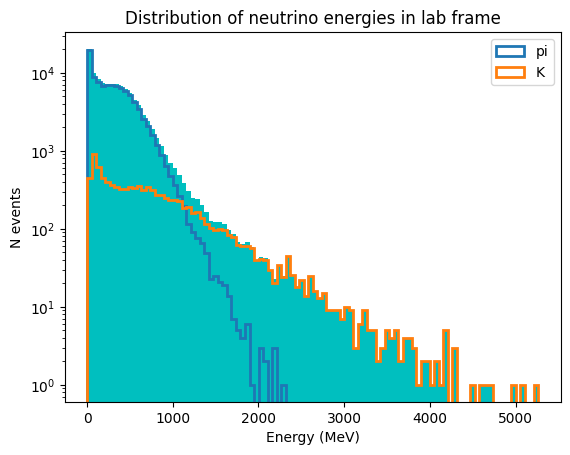

In [37]:
#combine arrays to get neutrino energies from all decays    
energy_nu_lf=np.append(energy_nu_lf_pi,energy_nu_lf_K)
range_energy=[min(energy_nu_lf),max(energy_nu_lf)]

plt.figure()

Nevents,bins,patches=plt.hist(energy_nu_lf, bins = 100, range=range_energy, log=True, color='c')
plt.hist(energy_nu_lf_pi, bins=100, range=range_energy, log=True, histtype='step', linewidth=2, label='pi')
plt.hist(energy_nu_lf_K, bins=100, range=range_energy, log=True, histtype='step', linewidth=2, label='K')

plt.xlabel('Energy (MeV)')
plt.ylabel('N events')
plt.title('Distribution of neutrino energies in lab frame')
plt.legend()
plt.show()

### Of course, in a real experiment you would measure events from both types of decay together and would have to try to differentiate afterwards. In 3.3(c) and (d), consider the following two quantities which might be useful for to differentiating the $\pi$ neutrinos and the K neutrinos. Plot the distribution of these for the decay events of the two decays which you've been considering.
#### 3.3(c) The value of $\theta_{lf}$ for the neutrino

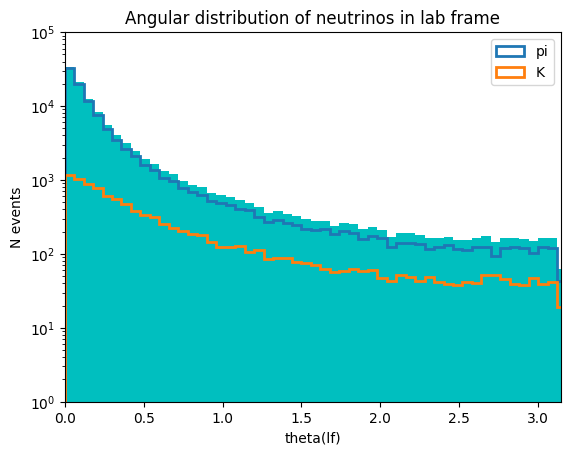

In [38]:
b4_lf_pi=boosted4mtmar(m4nu_rf_pi,beta_v_pi)
theta_lf_pi=np.pi/2-np.arctan2(b4_lf_pi[3], np.sqrt(b4_lf_pi[1]**2+b4_lf_pi[2]**2))

b4_lf_K=boosted4mtmar(m4nu_rf_K,beta_v_K)
theta_lf_K=np.pi/2-np.arctan2(b4_lf_K[3], np.sqrt(b4_lf_K[1]**2+b4_lf_K[2]**2))

#combine arrays to get neutrino energies from all decays    
theta_nu_lf=np.append(theta_lf_pi,theta_lf_K)
range_theta=[min(theta_nu_lf),max(theta_nu_lf)]

plt.figure()
Nevents,bins,patches=plt.hist(theta_nu_lf, bins = 100, range=[0,6], log=True, color='c')
plt.hist(theta_lf_pi, bins=100, range=[0,6], log=True, histtype='step', linewidth=2, label='pi')
plt.hist(theta_lf_K, bins=100, range=[0,6], log=True, histtype='step', linewidth=2, label='K')

plt.ylim([1e0,1e5])
plt.xlim([0,np.pi])
plt.xlabel('theta(lf)')
plt.ylabel('N events')
plt.legend()
plt.title('Angular distribution of neutrinos in lab frame')
plt.show()

#### 3.3(d) The energy of the neutrino at a particular $\theta_{lf}$. Use a log-scale to represent the energies.

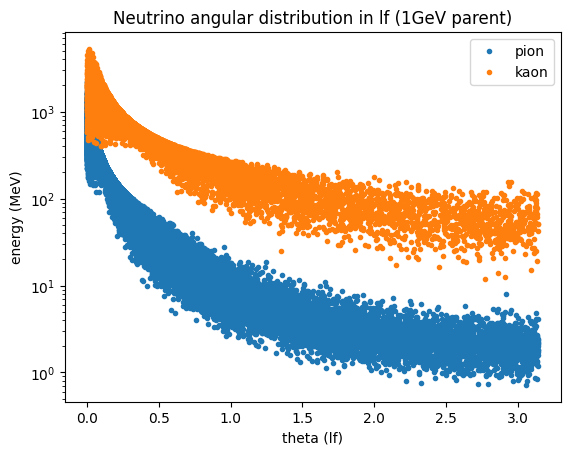

In [39]:
plt.semilogy(theta_lf_pi, energy_nu_lf_pi,'.',label='pion')
plt.semilogy(theta_lf_K, energy_nu_lf_K,'.',label='kaon')

plt.ylabel('energy (MeV)')
plt.xlabel('theta (lf)')
plt.title('Neutrino angular distribution in lf (1GeV parent)')
plt.legend()
plt.show()

### 3.3(e) What conclusion can you draw from 3.3(c) and 3.3(d) about whether you can infer the parent particle type (pi or K) from a detected neutrino from either or both of 3.3(c) and 3.3(d). ***INCLUDE YOUR CONCLUSION AND YOUR REASONING IN YOUR DEBUGGING REPORT. *** 